<a href="https://colab.research.google.com/github/sanjit1995/EmployeeAttritionRate_HE/blob/master/EmployeeAttritionRate_HE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/EmployeeAttritionRate_HE/Train.csv")
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/EmployeeAttritionRate_HE/Test.csv")

Handle NULL data

In [3]:
train_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [4]:
test_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [5]:
train_data[train_data['Gender'] == 'F']['Age'].median()

37.0

In [6]:
train_data['Work_Life_balance'].mode()

0    1.0
dtype: float64

In [0]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data['Time_of_service'].fillna(train_data['Time_of_service'].mode()[0], inplace=True)
test_data['Time_of_service'].fillna(test_data['Time_of_service'].mode()[0], inplace=True)

train_data['Pay_Scale'].fillna(train_data['Pay_Scale'].median(), inplace=True)
test_data['Pay_Scale'].fillna(test_data['Pay_Scale'].median(), inplace=True)

train_data['Work_Life_balance'].fillna(train_data['Work_Life_balance'].mode()[0], inplace=True)
test_data['Work_Life_balance'].fillna(test_data['Work_Life_balance'].mode()[0], inplace=True)

train_data['VAR2'].fillna(train_data['VAR2'].mode()[0], inplace=True)
test_data['VAR2'].fillna(test_data['VAR2'].mode()[0], inplace=True)

train_data['VAR4'].fillna(train_data['VAR4'].mode()[0], inplace=True)
test_data['VAR4'].fillna(test_data['VAR4'].mode()[0], inplace=True)

In [0]:
train_data.shape

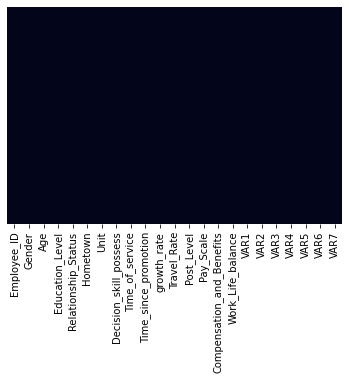

In [8]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

Data Exploration

In [9]:
train_data.head(3)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851


In [22]:
from scipy import stats
max(stats.zscore(train_data['Time_of_service']))

2.887262955308114

In [11]:
test_data['Age'].describe()

count    3000.000000
mean       39.701333
std        13.140587
min        19.000000
25%        28.000000
50%        38.000000
75%        51.000000
max        65.000000
Name: Age, dtype: float64

In [0]:
train_data['Time_of_service'].value_counts()

In [0]:
test_data['Age'].value_counts()

In [0]:
train_data.info()

One Hot encode the categorical columns and delete originals

In [0]:
cat_columns = ['Gender','Education_Level','Relationship_Status','Unit','Decision_skill_possess','Travel_Rate',
                'Post_Level','Pay_Scale','Compensation_and_Benefits','Work_Life_balance','VAR1','VAR2','VAR3',
               'VAR4','VAR5','VAR6','VAR7']

In [0]:
len(cat_columns)

In [0]:
train = train_data.copy()
test = test_data.copy()

In [0]:
for column in cat_columns:
  train = pd.concat([train,pd.get_dummies(train[column], prefix=column)], axis=1)
  test = pd.concat([test,pd.get_dummies(test[column], prefix=column)], axis=1)

In [0]:
train = train.drop(cat_columns, axis=1)
test = test.drop(cat_columns, axis=1)

In [29]:
train.shape

(7000, 93)

In [30]:
test.shape

(3000, 92)

In [0]:
train

Perform Data Normalization

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['Time_of_service'] = pd.DataFrame(scaler.fit_transform(train[['Time_of_service']]))
train['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(train[['Time_since_promotion']]))
train['growth_rate'] = pd.DataFrame(scaler.fit_transform(train[['growth_rate']]))
train['Age'] = pd.DataFrame(scaler.fit_transform(train[['Age']]))

In [0]:
test['Time_of_service'] = pd.DataFrame(scaler.fit_transform(test[['Time_of_service']]))
test['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(test[['Time_since_promotion']]))
test['growth_rate'] = pd.DataFrame(scaler.fit_transform(test[['growth_rate']]))
test['Age'] = pd.DataFrame(scaler.fit_transform(test[['Age']]))

In [0]:
train

In [0]:
test

Delete irrelevant columns

In [0]:
train = train.drop(['Employee_ID','Hometown'], axis=1)
test = test.drop(['Employee_ID','Hometown'], axis=1)

In [0]:
x_train = train.drop(['Attrition_rate'], axis=1)
y_train = train['Attrition_rate']

In [36]:
x_train.shape

(7000, 90)

In [37]:
y_train.shape

(7000,)

In [38]:
test.shape

(3000, 90)

Training Section

XGB regressor

In [0]:
import xgboost
regressor=xgboost.XGBRegressor()

In [0]:
n_estimators = [500, 700, 900, 1100, 1300]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]

In [0]:
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
}

RF regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [0]:
hyperparameter_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [0]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=100,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 2, 
            return_train_score = True,
            random_state=42)

In [72]:
random_cv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 65.9min


KeyboardInterrupt: ignored

In [0]:
random_cv.best_estimator_

In [0]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = regressor.predict(test)

In [66]:
y_pred.shape

(3000,)

In [67]:
y_pred

array([0.244436  , 0.24492267, 0.189784  , ..., 0.14692133, 0.18606827,
       0.2366272 ])

In [0]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/EmployeeAttritionRate_HE/Test.csv")
datasets = pd.concat([sub_df['Employee_ID'],pred], axis=1)
datasets.columns = ['Employee_ID', 'Attrition_rate']
datasets.to_csv('my_submission6.csv', index=False)